In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
xx = np.array([-0.51, 51.2])
yy = np.array([0.33, 51.6])
means = [xx.mean(), yy.mean()]  
stds = [xx.std() / 3, yy.std() / 3]
corr = 0.8         # correlation
covs = [[stds[0]**2          , stds[0]*stds[1]*corr], 
        [stds[0]*stds[1]*corr,           stds[1]**2]] 

m = np.random.multivariate_normal(means, covs, 1000).T

In [3]:
df=pd.DataFrame()

In [4]:
df['exp(in months)']=m[0]
df['salary(in thousands)']=m[1]

In [5]:
df.head()

,exp(in months),salary(in thousands)
0,37.369756,38.375000
1,8.734587,13.740642
2,20.446282,16.575886
3,24.036211,27.507529
4,27.625821,26.362656


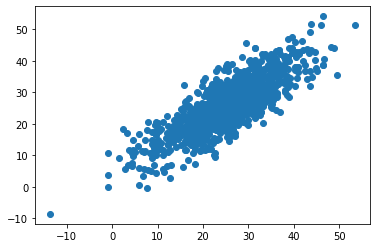

In [6]:
plt.scatter(df['exp(in months)'],df['salary(in thousands)'])

In [7]:
X=df.iloc[:,0:1].values
y=df.iloc[:,1].values

In [8]:
print(X.shape)
print(y.shape)

(1000, 1)
(1000,)


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [10]:
print(X_train.shape)
print(X_test.shape)

(800, 1)
(200, 1)


In [11]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [12]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
y_pred=regressor.predict(X_test)

In [14]:
# Finding the Coefs and intercept

# Equation of line is given by y=mx+b
# y=0.81*x + 5.50
# m ---> slope
# b ---> intercept

# X coefficient
print(regressor.coef_[0])

# Y intercept
print(regressor.intercept_)

0.8162373238485534
5.338252035395303


In [29]:
df_error=pd.DataFrame()
df_error['y_test']=y_test
df_error['y_pred']=y_pred
df_error.shape

(200, 2)

In [30]:
df_error

,y_test,y_pred
0,37.735717,38.412621
1,28.282315,27.844922
2,25.727622,27.594344
3,20.937128,19.910979
4,28.688200,33.497270
...,...,...
195,28.658985,31.339615
196,20.605840,19.178947
197,15.176302,21.767955
198,14.234716,19.320605


In [31]:
# Mean Absolute Error

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

3.9744114599015914

In [33]:
# Mean Squared Error

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

22.987365822918527

In [34]:
# Root Mean Squared Error
mse=mean_squared_error(y_test,y_pred)

np.sqrt(mse)

4.794514138358394

In [35]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7099863686805419

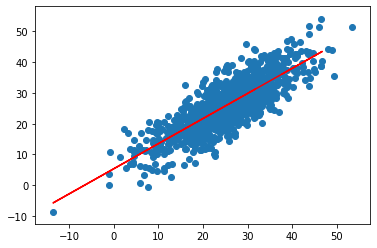

In [36]:
# Visualising the regression line
plt.plot(X_train,regressor.predict(X_train), color='red')
plt.scatter(df['exp(in months)'],df['salary(in thousands)'])